# Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
liver_df= pd.read_csv(r"C:\Users\shruti\Desktop\indian_liver_patient.csv")

In [3]:
liver_df.head(2)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1


In [4]:
liver_df.tail(2)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.0,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.5,2


# Exploratory Data Analysis (EDA)

In [5]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
# Checking for Null-Values

liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [8]:
liver_df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

# Data Visualization

Number of patient diagnosed with Liver disease:  416
Number of patient not diagnosed with Liver disease:  167


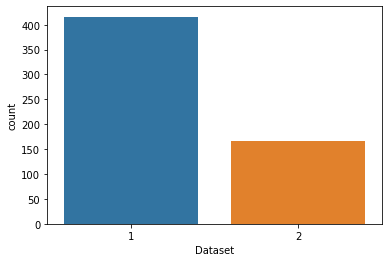

In [9]:
# Plotting Number of patient with Liver disease Vs Number of pateint with no Liver disease

sns.countplot(data=liver_df, x="Dataset", label= "Count")

LD, NLD= liver_df["Dataset"].value_counts()
print("Number of patient diagnosed with Liver disease: ", LD)
print("Number of patient not diagnosed with Liver disease: ", NLD)

Number of Male patient:  441
Number of Female patient:  142


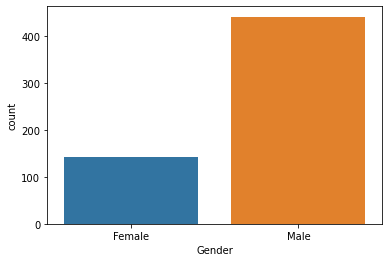

In [10]:
# Plotting Number of Male & Female patient

sns.countplot(data=liver_df, x="Gender", label= "Count")

M, F= liver_df["Gender"].value_counts()
print("Number of Male patient: ", M)
print("Number of Female patient: ", F)

<AxesSubplot:xlabel='Age', ylabel='Gender'>

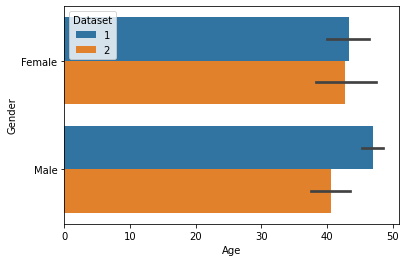

In [11]:
# Plotting Patient over Age Vs Gender
# In Dataset, 1 implies the patient have Liver disease; 2 implies the patients do not have Liver disease

sns.barplot(data=liver_df, x="Age", y="Gender", hue="Dataset")

In [12]:
liver_df[["Gender", "Age", "Dataset"]].groupby(["Dataset", "Gender"], 
                                               as_index= False).mean().sort_values(by="Dataset", ascending= False)

,Dataset,Gender,Age
2,2,Female,42.740000
3,2,Male,40.598291
0,1,Female,43.347826
1,1,Male,46.950617


Text(0.5, 0.98, 'Disease by Gender and Age')

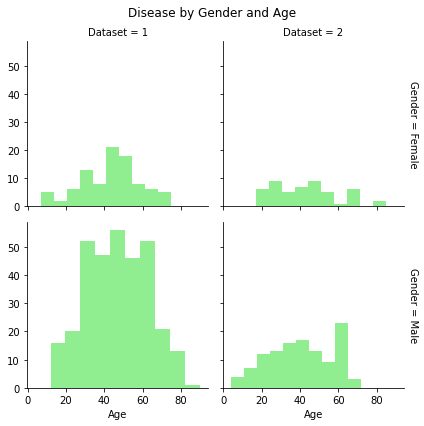

In [13]:
# Plotting Age Vs Gender

g= sns.FacetGrid(liver_df, col="Dataset", row= "Gender", margin_titles=True)
g.map(plt.hist, "Age", color="lightgreen")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Disease by Gender and Age")

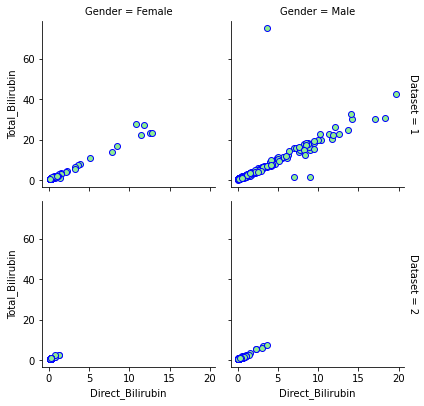

In [14]:
# Plotting Gender(Male/Female) along with Total_Bilirubin and Direct_Bilirubin

g= sns.FacetGrid(liver_df, col="Gender", row= "Dataset", margin_titles=True)
g.map(plt.scatter, "Direct_Bilirubin", "Total_Bilirubin", color="lightgreen", edgecolor="blue")
plt.subplots_adjust(top=0.9)

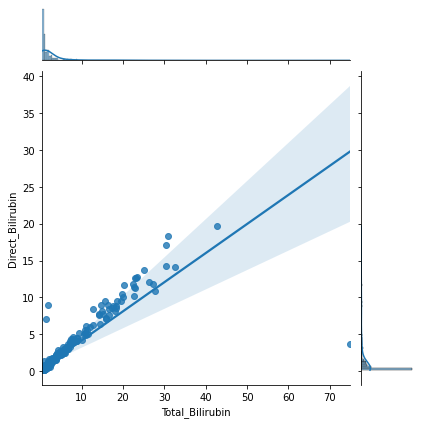

In [15]:
# Plotting Total_Bilirubin Vs Direct_Bilirubin

sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data= liver_df, kind="reg")

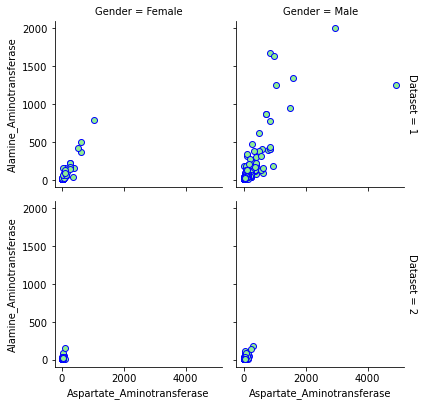

In [16]:
# Plotting Gender(Male/Female) along with Alamine_Aminotransferase and Aspartate_Aminotransferase

g= sns.FacetGrid(liver_df, col="Gender", row= "Dataset", margin_titles=True)
g.map(plt.scatter, "Aspartate_Aminotransferase", "Alamine_Aminotransferase", color="lightgreen", edgecolor="blue")
plt.subplots_adjust(top=0.9)

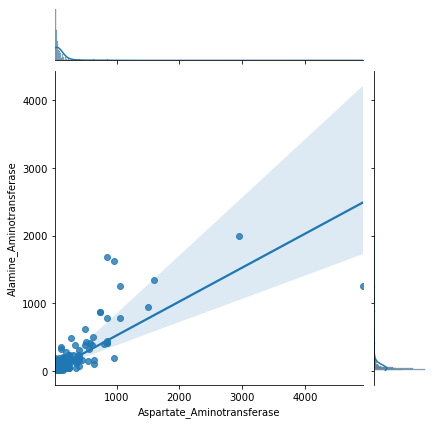

In [17]:
# Plotting Aspartate_Aminotransferase Vs Alamine_Aminotransferase

sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data= liver_df, kind="reg")

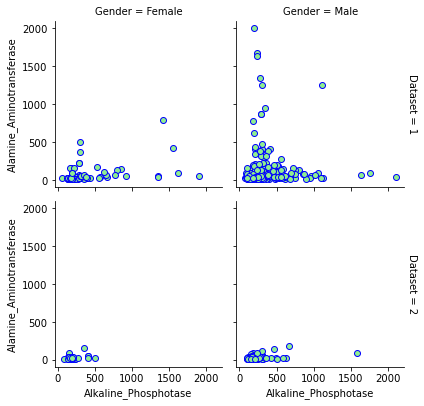

In [18]:
# Plotting Gender(Male/Female) along with Alkaline_Phosphotase and Alamine_Aminotransferase

g= sns.FacetGrid(liver_df, col="Gender", row= "Dataset", margin_titles=True)
g.map(plt.scatter, "Alkaline_Phosphotase", "Alamine_Aminotransferase", color="lightgreen", edgecolor="blue")
plt.subplots_adjust(top=0.9)

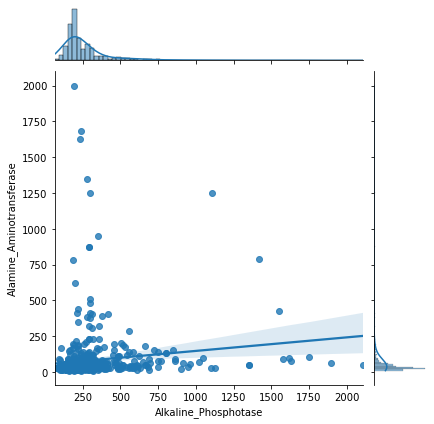

In [19]:
# Plotting Alkaline_Phosphotase Vs Alamine_Aminotransferase

sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data= liver_df, kind="reg")

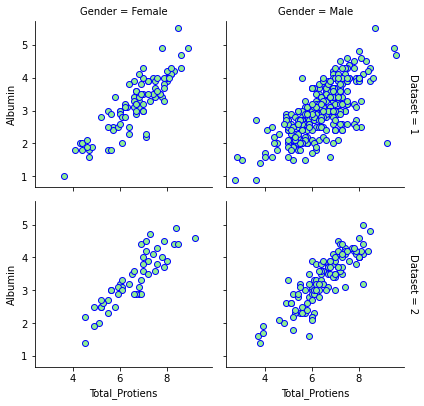

In [20]:
# Plotting Gender(Male/Female) along with Total_Protiens and Albumin

g= sns.FacetGrid(liver_df, col="Gender", row= "Dataset", margin_titles=True)
g.map(plt.scatter, "Total_Protiens", "Albumin", color="lightgreen", edgecolor="blue")
plt.subplots_adjust(top=0.9)

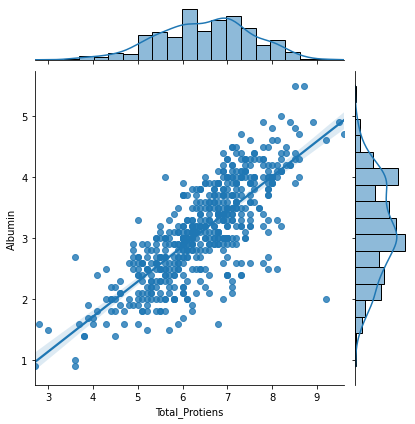

In [21]:
# Plotting Total_Protiens Vs Albumin

sns.jointplot("Total_Protiens", "Albumin", data= liver_df, kind="reg")

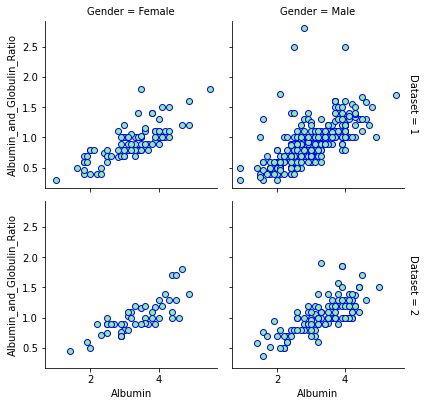

In [22]:
# Plotting Gender(Male/Female) along with Albumin and Albumin_and_Globulin_Ratio

g= sns.FacetGrid(liver_df, col="Gender", row= "Dataset", margin_titles=True)
g.map(plt.scatter, "Albumin", "Albumin_and_Globulin_Ratio", color="lightgreen", edgecolor="blue")
plt.subplots_adjust(top=0.9)

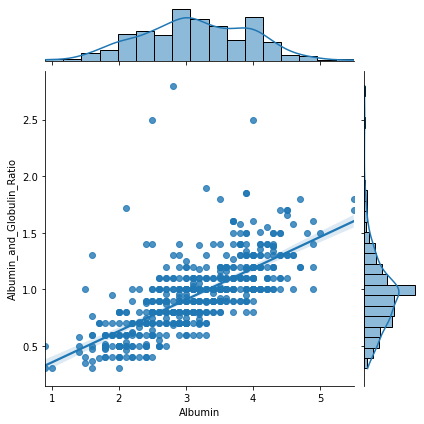

In [24]:
# Plotting Albumin Vs Albumin_and_Globulin_Ratio

sns.jointplot("Albumin", "Albumin_and_Globulin_Ratio", data= liver_df, kind="reg")

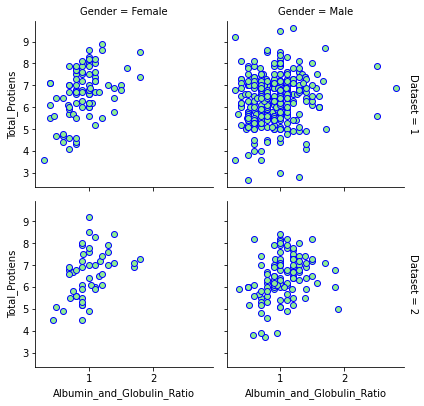

In [25]:
# Plotting Gender(Male/Female) along with Albumin_and_Globulin_Ratio and Total_Protiens

g= sns.FacetGrid(liver_df, col="Gender", row= "Dataset", margin_titles=True)
g.map(plt.scatter, "Albumin_and_Globulin_Ratio", "Total_Protiens", color="lightgreen", edgecolor="blue")
plt.subplots_adjust(top=0.9)

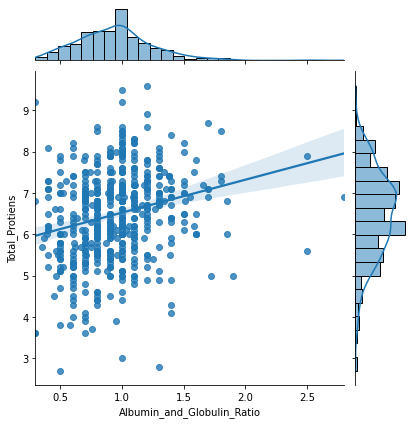

In [26]:
# Plotting Albumin_and_Globulin_Ratio Vs Total_Protiens

sns.jointplot("Albumin_and_Globulin_Ratio", "Total_Protiens", data= liver_df, kind="reg")

# Feature Engineering

In [27]:
liver_df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [28]:
pd.get_dummies(liver_df["Gender"], prefix="Gender").head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [31]:
# Concatenating

liver_df= pd.concat([liver_df,pd.get_dummies(liver_df["Gender"], prefix="Gender")], axis=1)

In [37]:
liver_df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1


In [33]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449,0.243568,0.756432
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490,0.429603,0.429603
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000,0.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000,0.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000,1.000000


In [34]:
liver_df[liver_df["Albumin_and_Globulin_Ratio"].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1,1,0
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1,0,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2,1,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2,0,1


In [35]:
liver_df["Albumin_and_Globulin_Ratio"]= liver_df.Albumin_and_Globulin_Ratio.fillna(liver_df["Albumin_and_Globulin_Ratio"].mean())

In [ ]:
X=liver_df.drop(["Gender", "Dataset"], axis=1)
X.head(2)

In [40]:
y= liver_df["Dataset"]

# Correlation between all features

In [43]:
liver_corr= X.corr()
liver_corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.056560,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.089291,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.100436,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,0.027496,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.082332,0.082332
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.080336,0.080336
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.089121,-0.089121
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.093799,-0.093799
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.003404,-0.003404
Gender_Female,-0.056560,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003404,1.000000,-1.000000


Text(0.5, 1.0, 'Correlation between all the features')

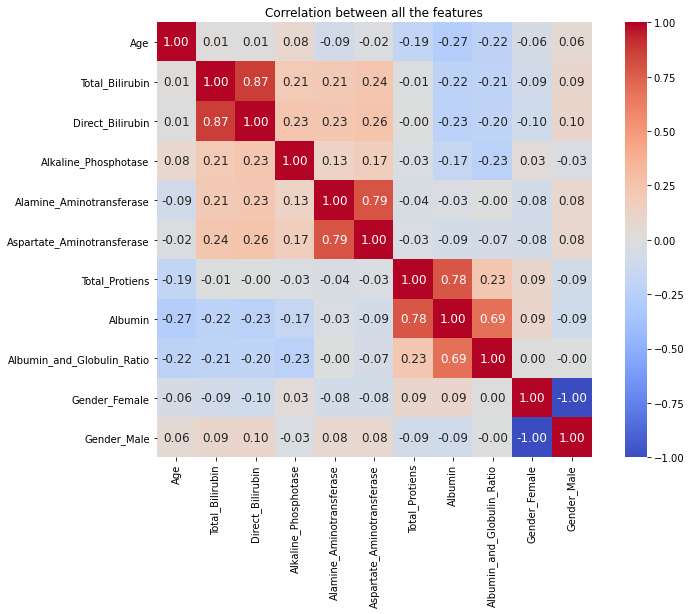

In [46]:
# Plotting Heatmaps for correlation between all features

plt.figure(figsize=(12,8))
sns.heatmap(liver_corr, cbar=True, square=True, annot=True, fmt=".2f", annot_kws={"size":12}, cmap="coolwarm")
plt.title("Correlation between all the features")

# Splitting data into Train & Test

In [50]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(390, 11)
(193, 11)
(390,)
(193,)


# Model Building

### 1. Logistic Regression

In [58]:
logreg= LogisticRegression()

# Training model using training sets and check score
logreg.fit(X_train, y_train)

# Predict Output
log_predicted= logreg.predict(X_test)

logreg_score= round(logreg.score(X_train, y_train)*100, 2)
logreg_score_test= round(logreg.score(X_test, y_test)*100, 2)

# Equation coefficient & Intercept
print("Logistic Regression Training Score: \n", logreg_score)
print("Logistic Regression Training Score: \n", logreg_score_test)

print("Accuracy: \n", accuracy_score(y_test, log_predicted))
print("Confusion Matrix: \n", confusion_matrix(y_test, log_predicted))
print("Classification Report: \n", classification_report(y_test, log_predicted))

Logistic Regression Training Score: 
 71.03
Logistic Regression Training Score: 
 73.06
Accuracy: 
 0.7305699481865285
Confusion Matrix: 
 [[133   8]
 [ 44   8]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.75      0.94      0.84       141
           2       0.50      0.15      0.24        52

    accuracy                           0.73       193
   macro avg       0.63      0.55      0.54       193
weighted avg       0.68      0.73      0.67       193



#### Confusion Matrix

<AxesSubplot:>

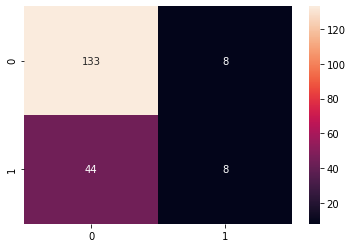

In [59]:
sns.heatmap(confusion_matrix(y_test, log_predicted), annot=True, fmt="d")

### 2. Gaussian Naive Bayes

In [60]:
gaussian= GaussianNB()
gaussian.fit(X_train, y_train)

gauss_predicted= gaussian.predict(X_test)

gauss_score= round(gaussian.score(X_train, y_train)*100,2)
gauss_score_test= round(gaussian.score(X_test, y_test)*100,2)

print("Gaussian Score: \n", gauss_score)
print("Gaussian Score: \n", gauss_score_test)

print("Accuracy: \n", accuracy_score(y_test, gauss_predicted))
print("Confusion Matrix: \n", confusion_matrix(y_test, gauss_predicted))
print("Classification Report: \n", classification_report(y_test, gauss_predicted))

Gaussian Score: 
 53.59
Gaussian Score: 
 57.51
Accuracy: 
 0.5751295336787565
Confusion Matrix: 
 [[60 81]
 [ 1 51]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.98      0.43      0.59       141
           2       0.39      0.98      0.55        52

    accuracy                           0.58       193
   macro avg       0.68      0.70      0.57       193
weighted avg       0.82      0.58      0.58       193



#### Confusion Matrix

<AxesSubplot:>

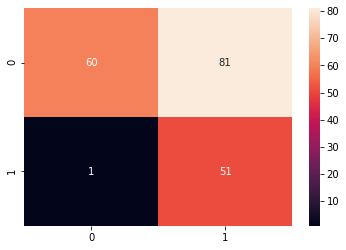

In [61]:
sns.heatmap(confusion_matrix(y_test, gauss_predicted), annot=True, fmt="d")

### 3. Random Forest

In [62]:
random_forest= RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

rf_predicted= gaussian.predict(X_test)

random_forest_score= round(random_forest.score(X_train, y_train)*100,2)
random_forest_score_test= round(random_forest.score(X_test, y_test)*100,2)

print("Random Forest Score: \n", random_forest_score)
print("Random Forest Score: \n", random_forest_score_test)

print("Accuracy: \n", accuracy_score(y_test, rf_predicted))
print("Confusion Matrix: \n", confusion_matrix(y_test, rf_predicted))
print("Classification Report: \n", classification_report(y_test, rf_predicted))

Random Forest Score: 
 100.0
Random Forest Score: 
 71.5
Accuracy: 
 0.5751295336787565
Confusion Matrix: 
 [[60 81]
 [ 1 51]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.98      0.43      0.59       141
           2       0.39      0.98      0.55        52

    accuracy                           0.58       193
   macro avg       0.68      0.70      0.57       193
weighted avg       0.82      0.58      0.58       193



#### Confusion Matrix

<AxesSubplot:>

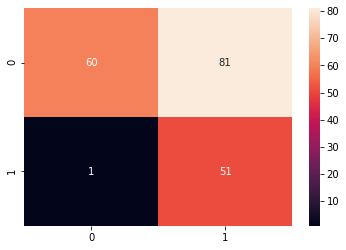

In [63]:
sns.heatmap(confusion_matrix(y_test, rf_predicted), annot=True, fmt="d")

# Model Evaluation

In [65]:
# Comparing all Models

models= pd.DataFrame({
    "Model": ["Logistic Regression", "Gaussian Naive Bayes", "Ramdom Forest"],
    "Score": [logreg_score, gauss_score, random_forest_score],
    "Test Score": [logreg_score_test, gauss_score_test, random_forest_score_test]})
models.sort_values(by="Test Score", ascending=False)

,Model,Score,Test Score
0,Logistic Regression,71.03,73.06
2,Ramdom Forest,100.00,71.50
1,Gaussian Naive Bayes,53.59,57.51


# Conclusion

### Among all the Models, Logistic Regression Model perform the best Model Building on this Dataset